In [18]:
import random
import cv2
import numpy as np
from skimage.transform import rescale, resize
from skimage import io
from skimage import data
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def salt_and_pepper(img):

    row , col = img.shape
    
    size=row*col
    
    number_of_pixels = 1500
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = 1500
    
    for i in range(number_of_pixels):
        
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    
    return img


In [21]:
source ='Original'
image_list=os.listdir(source)
for i in image_list:
    img = cv2.imread(source+'/'+i,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(100,100))
    cv2.imwrite(source+"/"+i,img)

In [22]:
source ='Original'
image_list=os.listdir(source)
for i in image_list:
    img = cv2.imread(source+'/'+i,cv2.IMREAD_GRAYSCALE)
    cv2.imwrite("Noised/"+i,salt_and_pepper(img))

In [23]:
source ='Original'
image_list=os.listdir(source)
train=[]

for i in image_list:
    img = io.imread(source+'/'+i)
    img.shape
    img = image.img_to_array(img)
    img = img/255
    train.append(img)

train = np.array(train)

In [24]:
source ='Noised'
image_list=os.listdir(source)

noise_train=[]

for i in image_list:
    img = io.imread(source+'/'+i)
    img = image.img_to_array(img)
    img = img/255
    noise_train.append(img)

noise_train = np.array(noise_train)

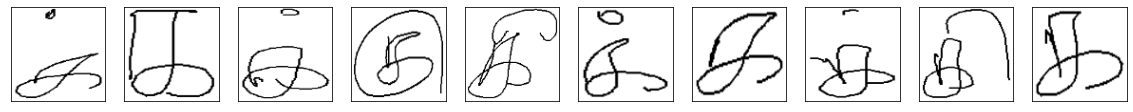

In [25]:
# ORIGINAL IMAGE

plt.figure(figsize=(20, 4))
for i in range(1,11):
    ax = plt.subplot(2, 10, i)
    plt.imshow(train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

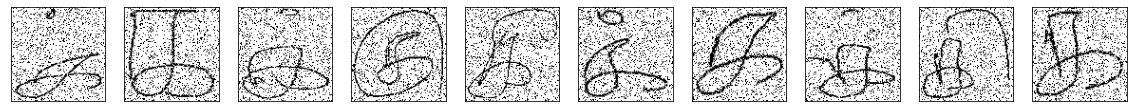

In [26]:
# NOISE IMAGE

plt.figure(figsize=(20, 4))
for i in range(1,11):
    ax = plt.subplot(2, 10, i)
    plt.imshow(noise_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [27]:
x_train=train[:800]
x_test=train[800:]

x_train_noise=noise_train[:800]
x_test_noise=noise_train[800:]

In [28]:
print(x_train_noise.shape)
print(x_test_noise.shape)

(800, 100, 100, 1)
(67, 100, 100, 1)


In [29]:
import tensorflow.keras as keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(100, 100, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
autoencoder.fit(x_train_noise, x_train,epochs=10,batch_size=50,shuffle=False,validation_data=(x_test_noise, x_test))

Epoch 1/10
16/16 [==============================] - 23s 1s/step - loss: 0.3982 - val_loss: 0.2877
Epoch 2/10
16/16 [==============================] - 21s 1s/step - loss: 0.2879 - val_loss: 0.2806
Epoch 3/10
16/16 [==============================] - 21s 1s/step - loss: 0.2726 - val_loss: 0.2595
Epoch 4/10
16/16 [==============================] - 21s 1s/step - loss: 0.2365 - val_loss: 0.2069
Epoch 5/10
16/16 [==============================] - 20s 1s/step - loss: 0.1860 - val_loss: 0.1670
Epoch 6/10
16/16 [==============================] - 20s 1s/step - loss: 0.1574 - val_loss: 0.1443
Epoch 7/10
16/16 [==============================] - 20s 1s/step - loss: 0.1368 - val_loss: 0.1288
Epoch 8/10
16/16 [==============================] - 20s 1s/step - loss: 0.1243 - val_loss: 0.1197
Epoch 9/10
16/16 [==============================] - 20s 1s/step - loss: 0.1163 - val_loss: 0.1130
Epoch 10/10
16/16 [==============================] - 20s 1s/step - loss: 0.1103 - val_loss: 0.1074


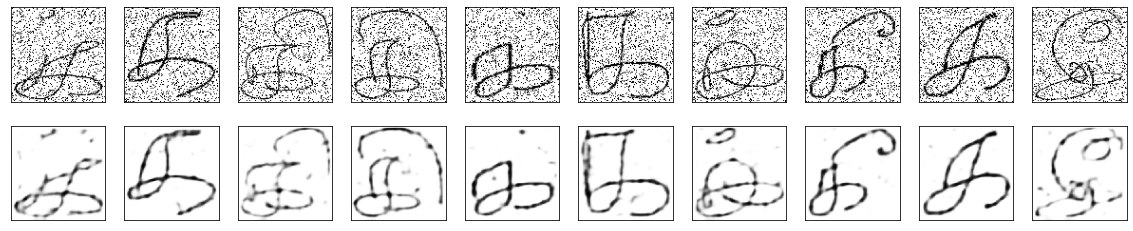

In [31]:
decoded = autoencoder.predict(x_test_noise)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noise[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()